In [ ]:
!pip install kaggle -q

In [ ]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
kaggle_config = json.load(open('/content/kaggle.json'))
kaggle_config.keys()
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']


In [ ]:
!kaggle datasets download -d notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls


kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [ ]:
with zipfile.ZipFile('/content/spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
df = pd.read_csv('/content/spotify_millsongdata.csv')

In [ ]:
df.shape

(57650, 4)

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists :")
top_artists


Top 10 Artists :


,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


In [ ]:
df = df.sample(10000)

df = df.drop('link',axis=1).reset_index(drop=True)

In [ ]:
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

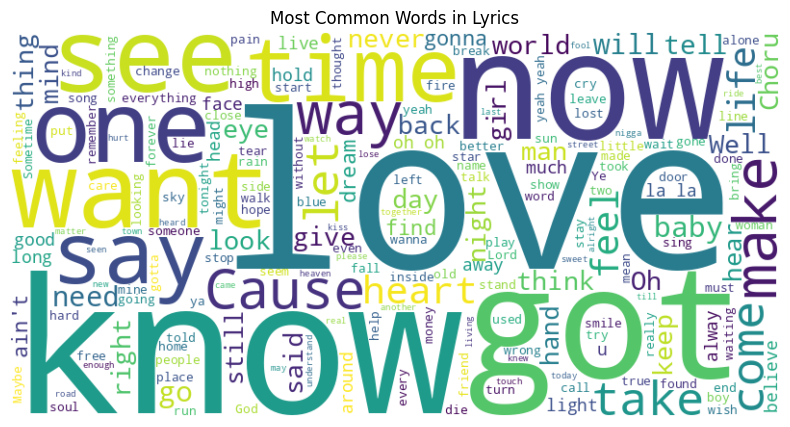

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Lyrics')
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
from operator import index
def recommend_songs(song_name,cosine_sim=cosine_sim,df=df,top_n=5):
  idx =df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0:
    return "Song not found in the dataset"
  idx = idx[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  song_indices  = [i[0] for i in sim_scores]
  return df[['artist','song']].iloc[song_indices]

In [ ]:
df['song'][2]

'On This Day'

In [ ]:
print("\nRecommendation for the song 'Blinded By Rainbows':")
recommentations = recommend_songs('Christmas Memories')
print(recommentations)


Recommendation for the song 'Blinded By Rainbows':
                  artist                              song
4243          Perry Como                   Christmas Bells
3363      Jose Mari Chan           Christmas In Our Hearts
7039  Marianne Faithfull       I Saw Three Ships A-Sailing
9124       Justin Bieber                 All I Want Is You
1439             'n Sync  All I Want Is You This Christmas
